In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
display(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
df = df.drop(columns=['Channel', 'Region'])
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [14]:
df.isnull().sum()

,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [15]:
df = df.rename(columns={
    'Fresh': 'Yangi_mahsulotlar',
    'Milk': 'Sut',
    'Grocery': 'Oziq_ovqat_mahsulotlari',
    'Frozen': 'Muzlatilgan_mahsulotlar',
    'Detergents_Paper': 'Tozalovchi_va_qogozlar',
    'Delicassen': 'Delikates_mahsulotlar'
})


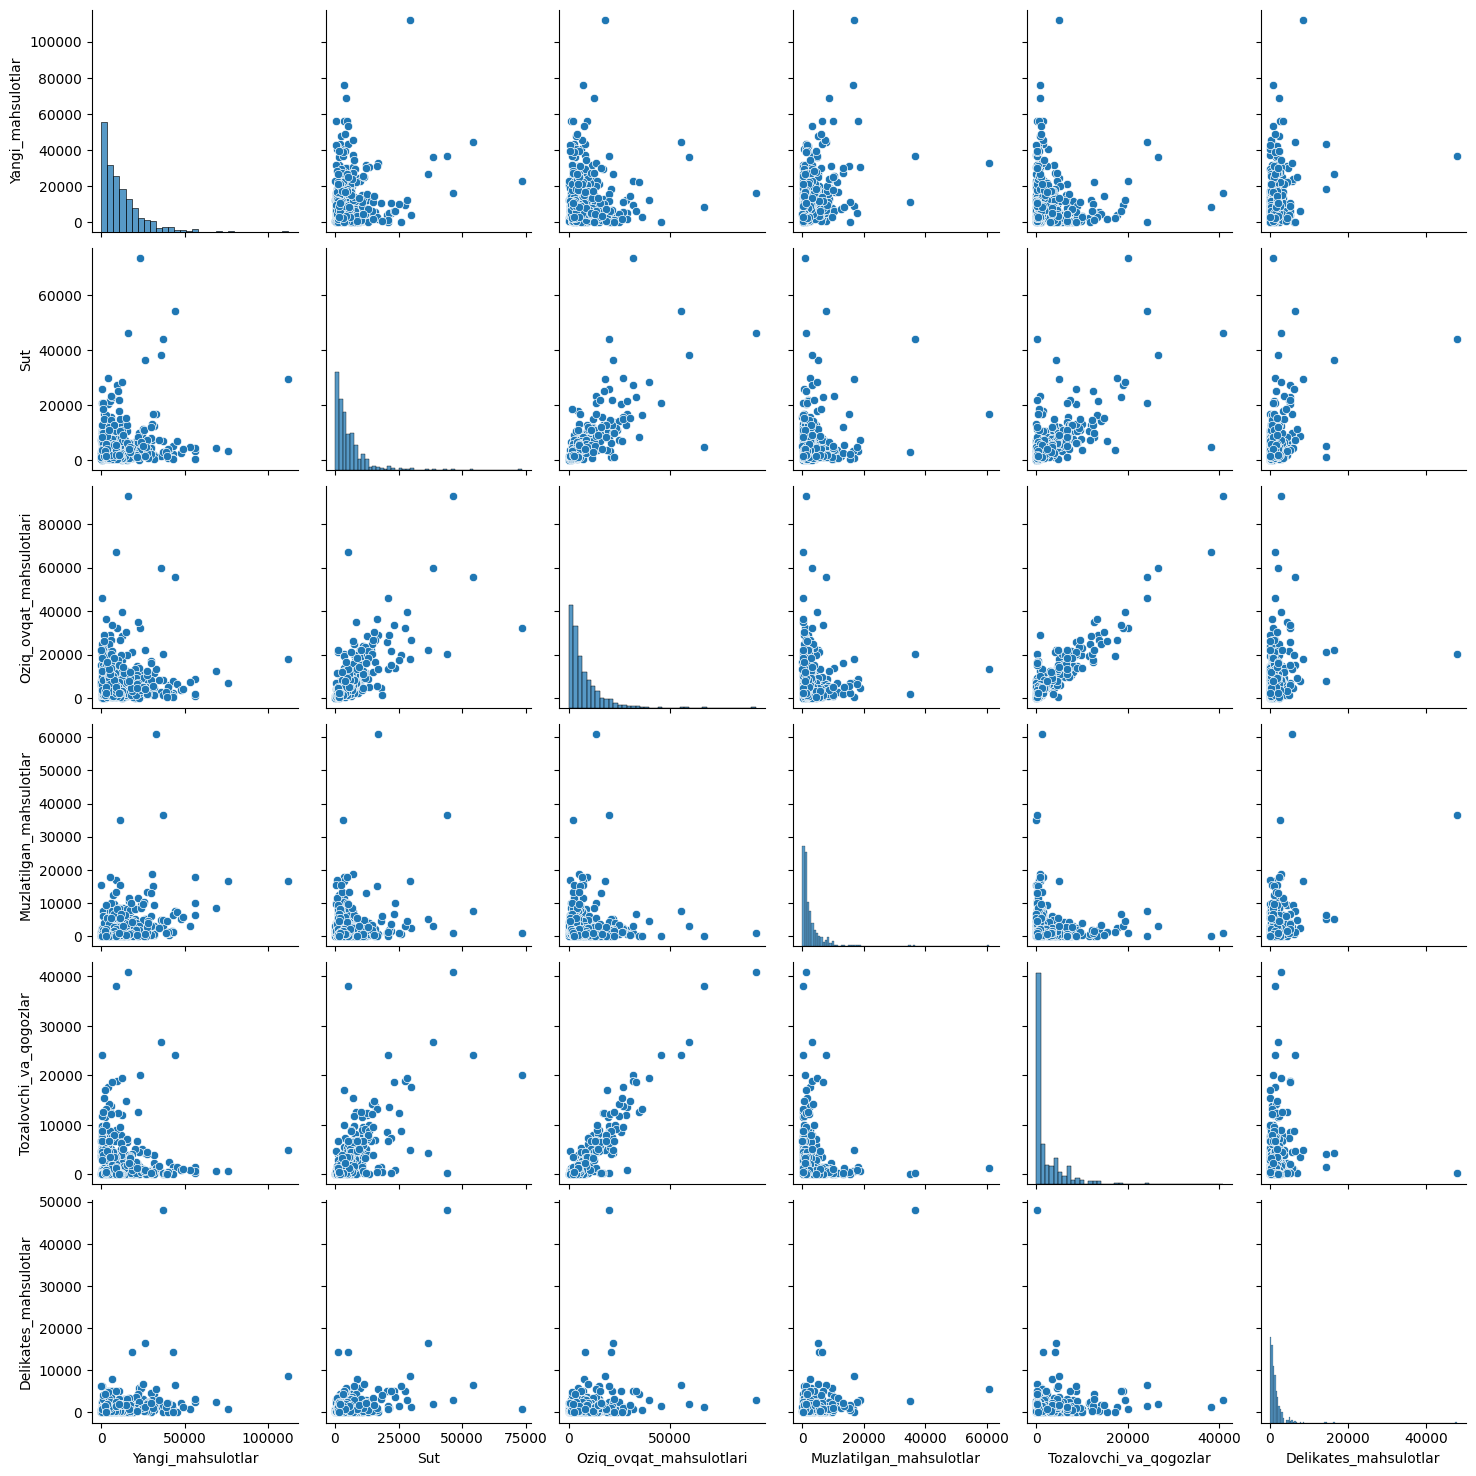

In [18]:
sns.pairplot(df)
plt.show()


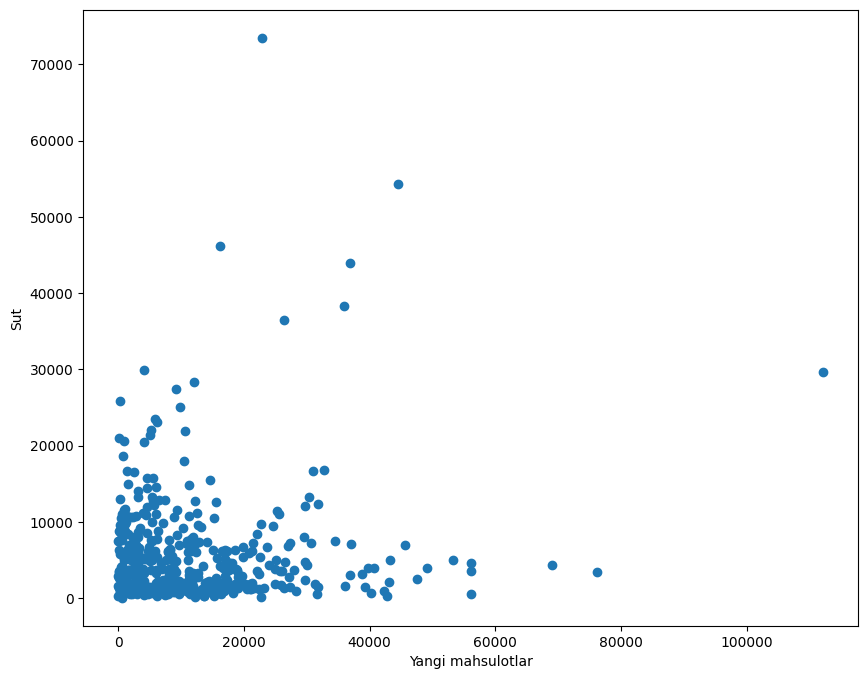

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Yangi_mahsulotlar'], df['Sut'])
plt.xlabel('Yangi mahsulotlar')
plt.ylabel('Sut')
plt.show()

In [41]:
from sklearn.cluster import KMeans
x = df[['Sut', 'Yangi_mahsulotlar']]
royxat=[]
for i in range(1, 11):
 kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x)
 royxat.append(kmeans.inertia_)

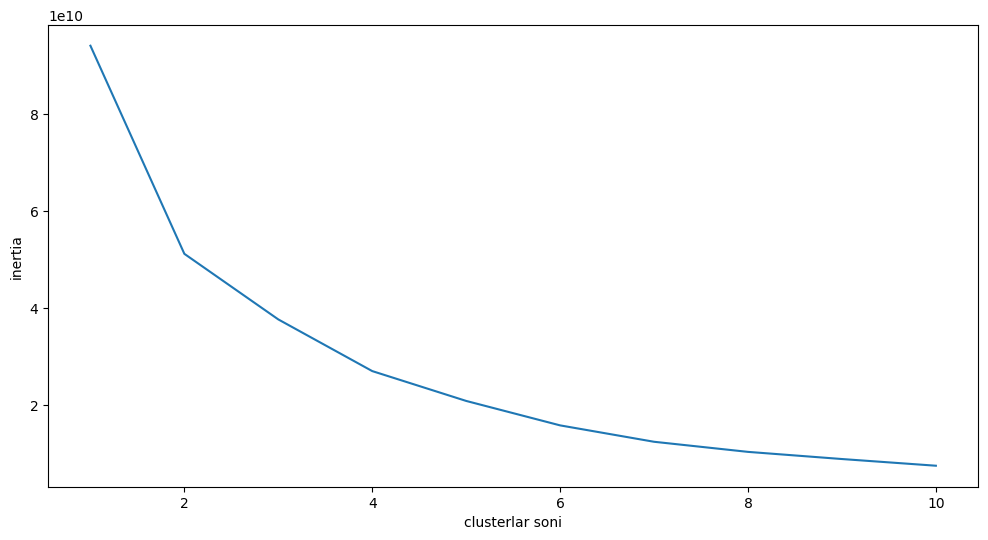

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), royxat)
plt.xlabel('clusterlar soni')
plt.ylabel('inertia')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_predicted=kmeans.fit_predict(x)

In [44]:
df['cluster']=y_predicted

In [33]:
df.head()

,Yangi_mahsulotlar,Sut,Oziq_ovqat_mahsulotlari,Muzlatilgan_mahsulotlar,Tozalovchi_va_qogozlar,Delikates_mahsulotlar,cluster
0,12669,9656,7561,214,2674,1338,7
1,7057,9810,9568,1762,3293,1776,8
2,6353,8808,7684,2405,3516,7844,8
3,13265,1196,4221,6404,507,1788,7
4,22615,5410,7198,3915,1777,5185,2


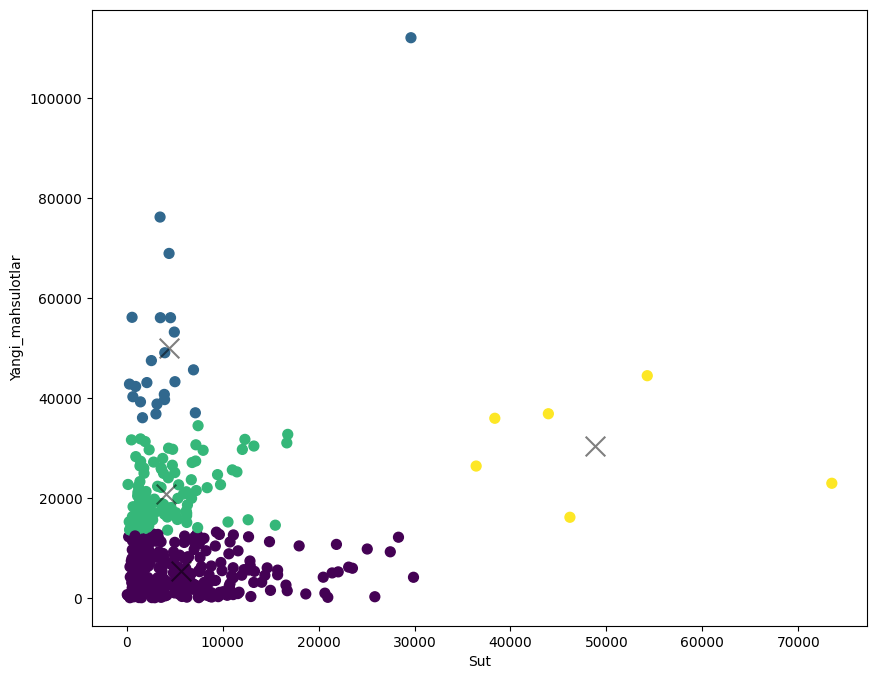

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y_predicted,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5,marker='x')
plt.xlabel('Sut')
plt.ylabel('Yangi_mahsulotlar')
plt.show()

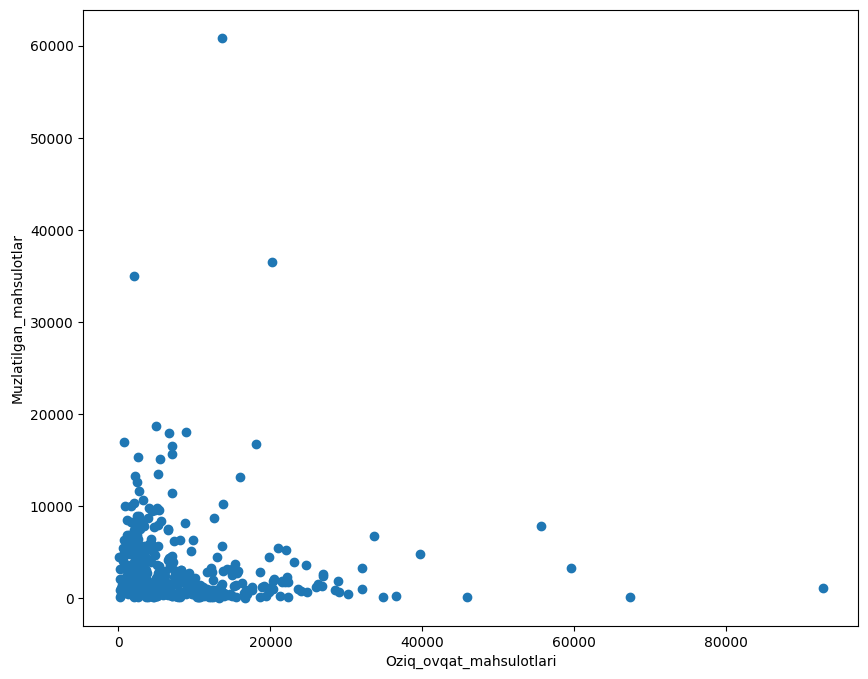

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Oziq_ovqat_mahsulotlari'], df['Muzlatilgan_mahsulotlar'])
plt.xlabel('Oziq_ovqat_mahsulotlari')
plt.ylabel('Muzlatilgan_mahsulotlar')
plt.show()

In [47]:
from sklearn.cluster import KMeans
x = df[['Oziq_ovqat_mahsulotlari', 'Muzlatilgan_mahsulotlar']]
royxat=[]
for i in range(1, 11):
 kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x)
 royxat.append(kmeans.inertia_)

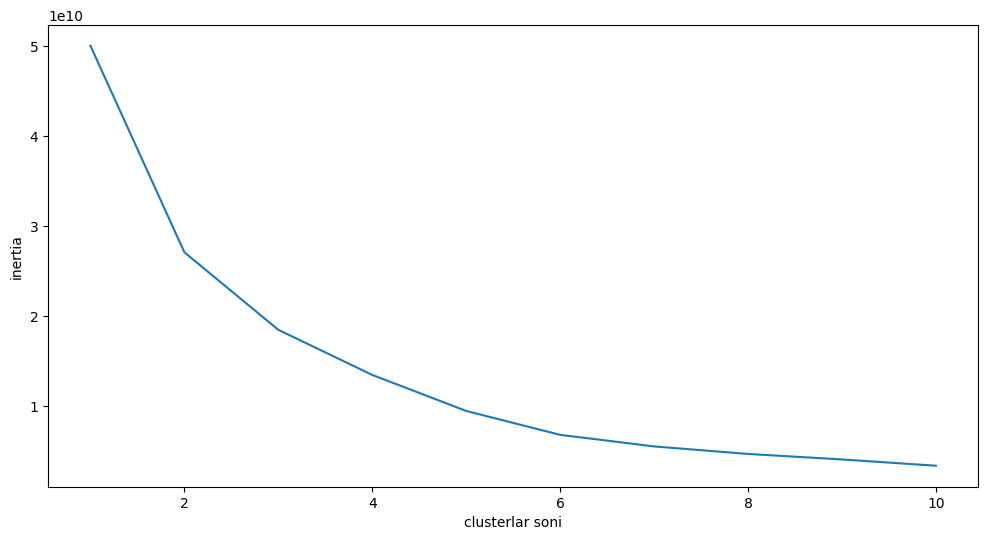

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), royxat)
plt.xlabel('clusterlar soni')
plt.ylabel('inertia')
plt.show()

In [49]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_predicted=kmeans.fit_predict(x)

In [50]:
df['cluster1']=y_predicted
df.head()

,Yangi_mahsulotlar,Sut,Oziq_ovqat_mahsulotlari,Muzlatilgan_mahsulotlar,Tozalovchi_va_qogozlar,Delikates_mahsulotlar,cluster,cluster1
0,12669,9656,7561,214,2674,1338,0,1
1,7057,9810,9568,1762,3293,1776,0,1
2,6353,8808,7684,2405,3516,7844,0,1
3,13265,1196,4221,6404,507,1788,2,1
4,22615,5410,7198,3915,1777,5185,2,1


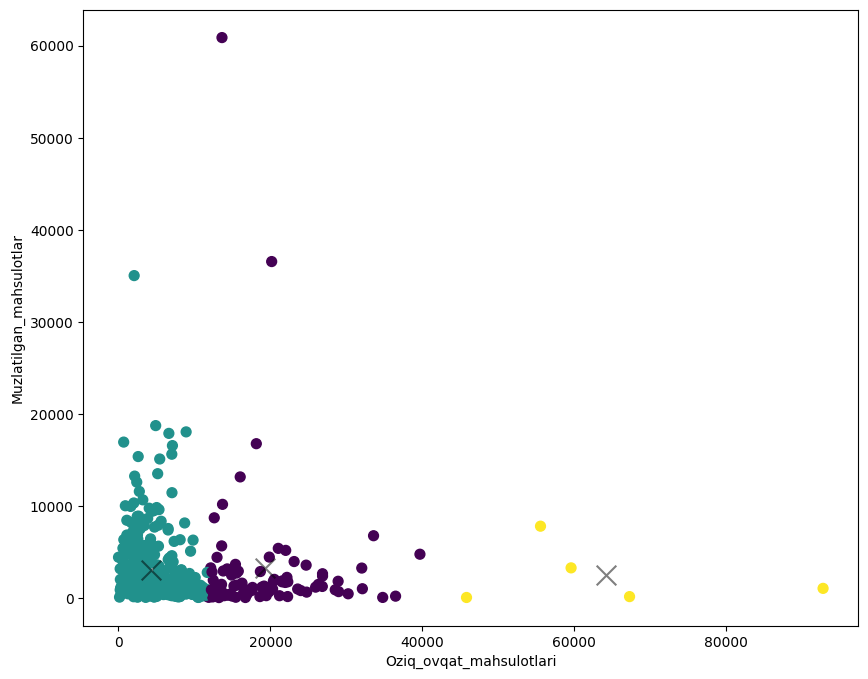

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y_predicted,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5,marker='x')
plt.xlabel('Oziq_ovqat_mahsulotlari')
plt.ylabel('Muzlatilgan_mahsulotlar')
plt.show()

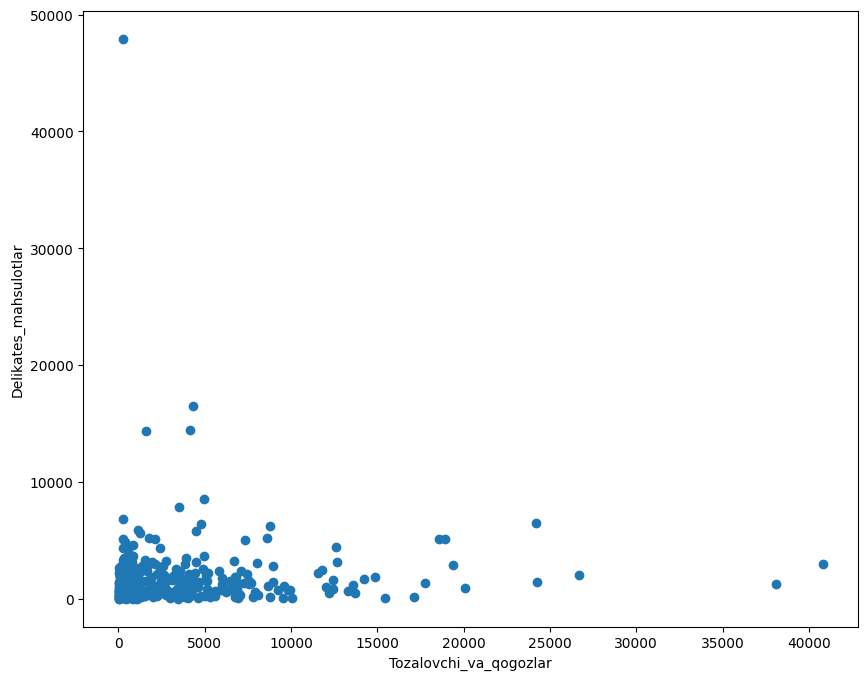

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Tozalovchi_va_qogozlar'], df['Delikates_mahsulotlar'])
plt.xlabel('Tozalovchi_va_qogozlar')
plt.ylabel('Delikates_mahsulotlar')
plt.show()

In [53]:
x = df[['Tozalovchi_va_qogozlar', 'Delikates_mahsulotlar']]
royxat=[]
for i in range(1, 11):
 kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x)
 royxat.append(kmeans.inertia_)

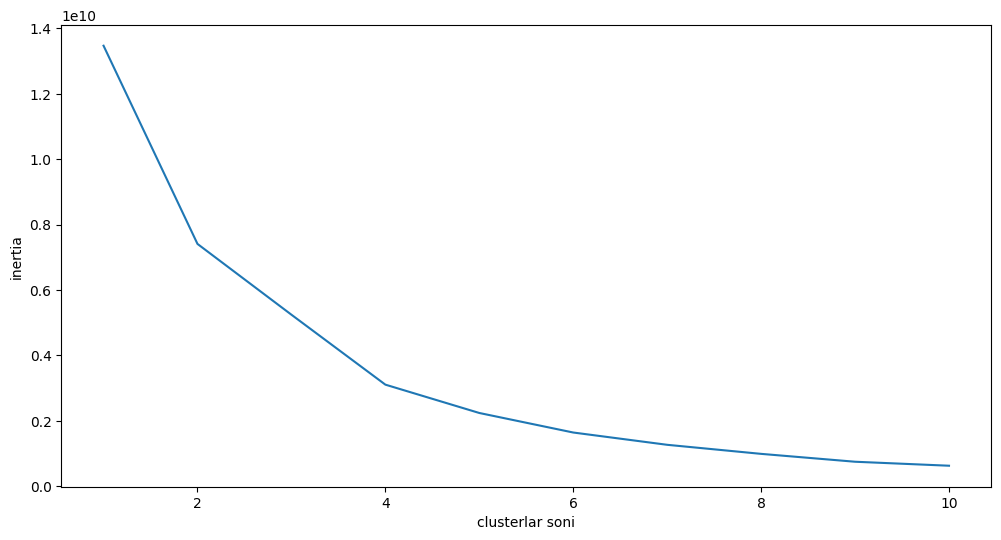

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), royxat)
plt.xlabel('clusterlar soni')
plt.ylabel('inertia')
plt.show()

In [55]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_predicted=kmeans.fit_predict(x)

In [56]:
df['cluster2']=y_predicted
df.head()

,Yangi_mahsulotlar,Sut,Oziq_ovqat_mahsulotlari,Muzlatilgan_mahsulotlar,Tozalovchi_va_qogozlar,Delikates_mahsulotlar,cluster,cluster1,cluster2
0,12669,9656,7561,214,2674,1338,0,1,0
1,7057,9810,9568,1762,3293,1776,0,1,0
2,6353,8808,7684,2405,3516,7844,0,1,0
3,13265,1196,4221,6404,507,1788,2,1,0
4,22615,5410,7198,3915,1777,5185,2,1,0


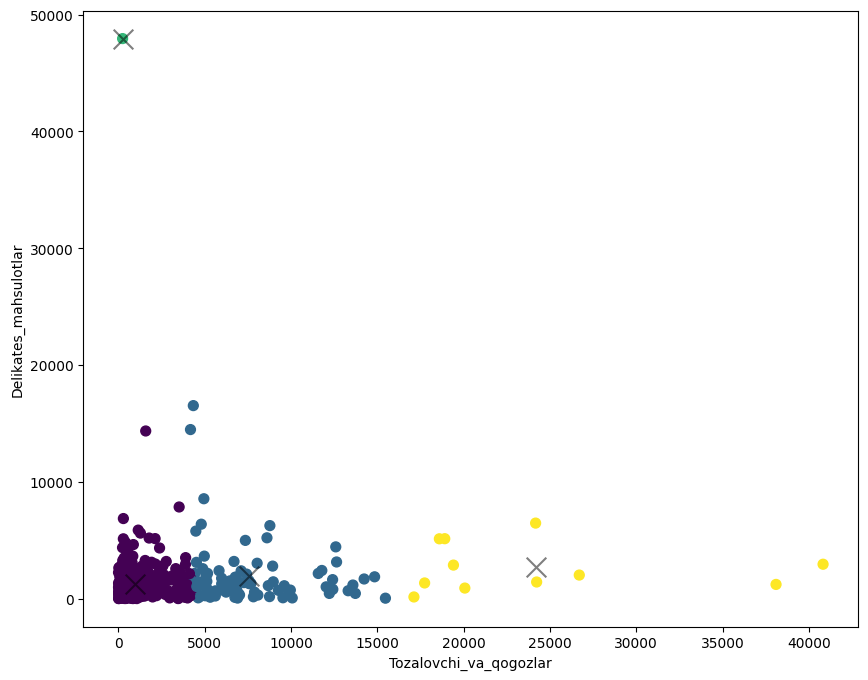

In [57]:
plt.figure(figsize=(10, 8))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y_predicted,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5,marker='x')
plt.xlabel('Tozalovchi_va_qogozlar')
plt.ylabel('Delikates_mahsulotlar')
plt.show()

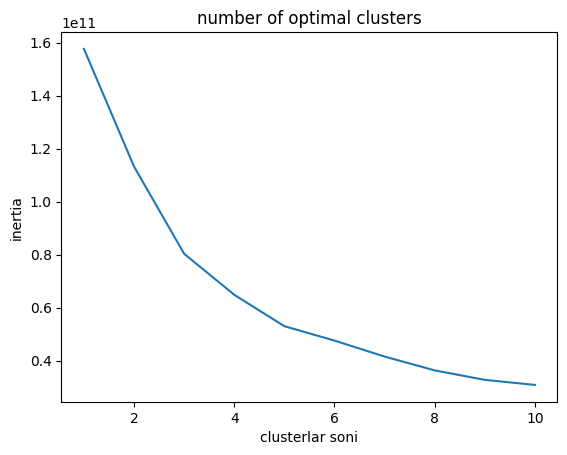

In [59]:
x=df[['Yangi_mahsulotlar','Sut','Oziq_ovqat_mahsulotlari','Muzlatilgan_mahsulotlar','Tozalovchi_va_qogozlar','Delikates_mahsulotlar']]
royxat=[]
for i in range(1, 11):
 kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x)
 royxat.append(kmeans.inertia_)

plt.plot(range(1, 11), royxat)
plt.xlabel('clusterlar soni')
plt.ylabel('inertia')
plt.title('number of optimal clusters')
plt.show()

In [60]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_predicted=kmeans.fit_predict(x)

In [61]:
df['optimal cluster']=y_predicted
df.head()

,Yangi_mahsulotlar,Sut,Oziq_ovqat_mahsulotlari,Muzlatilgan_mahsulotlar,Tozalovchi_va_qogozlar,Delikates_mahsulotlar,cluster,cluster1,cluster2,optimal cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0
1,7057,9810,9568,1762,3293,1776,0,1,0,0
2,6353,8808,7684,2405,3516,7844,0,1,0,0
3,13265,1196,4221,6404,507,1788,2,1,0,0
4,22615,5410,7198,3915,1777,5185,2,1,0,1


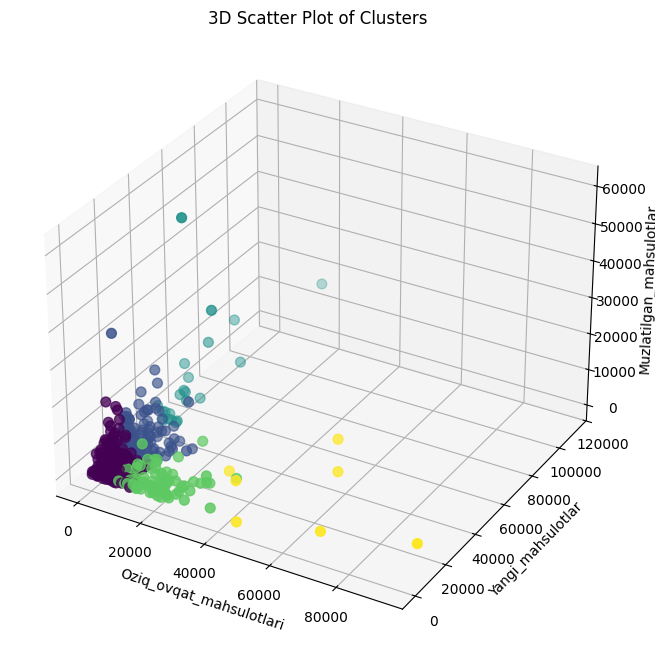

In [62]:
from mpl_toolkits.mplot3d import Axes3D

X = df[['Oziq_ovqat_mahsulotlari', 'Yangi_mahsulotlar', 'Muzlatilgan_mahsulotlar']].values
k_means = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
k_means.fit(df[['Yangi_mahsulotlar','Sut','Oziq_ovqat_mahsulotlari','Muzlatilgan_mahsulotlar','Tozalovchi_va_qogozlar','Delikates_mahsulotlar']])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Oziq_ovqat_mahsulotlari')
ax.set_ylabel('Yangi_mahsulotlar')
ax.set_zlabel('Muzlatilgan_mahsulotlar')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=k_means.labels_.astype(float), cmap='viridis', s=50)

plt.title('3D Scatter Plot of Clusters')
plt.show()

In [63]:
import pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(k_means, f)
print("KMeans model saved as 'kmeans_model.pkl'")

KMeans model saved as 'kmeans_model.pkl'
